<a href="https://colab.research.google.com/github/AnyasorG/Analytic-Bootcamp/blob/main/Copy_of_machine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 1: Install the Kaggle API if not already installed
!pip install -q kaggle

# Step 2: Upload your Kaggle API key file (kaggle.json) to Google Colab
from google.colab import files
files.upload()  # Upload your Kaggle API key file (kaggle.json)

# Step 3: Move the uploaded kaggle.json file to the appropriate directory and set appropriate permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset using the Kaggle API command
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset



Saving kaggle.json to kaggle.json
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 77.3MB/s]


In [ ]:
!unzip diabetes-prediction-dataset.zip


Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows of the DataFrame
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Display basic information about the dataset
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# Display summary statistics of numerical columns
df.describe().round()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,42.0,0.0,0.0,27.0,6.0,138.0,0.0
std,23.0,0.0,0.0,7.0,1.0,41.0,0.0
min,0.0,0.0,0.0,10.0,4.0,80.0,0.0
25%,24.0,0.0,0.0,24.0,5.0,100.0,0.0
50%,43.0,0.0,0.0,27.0,6.0,140.0,0.0
75%,60.0,0.0,0.0,30.0,6.0,159.0,0.0
max,80.0,1.0,1.0,96.0,9.0,300.0,1.0


In [ ]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

3854

In [ ]:
duplicates = df[df.duplicated()]
duplicates.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0


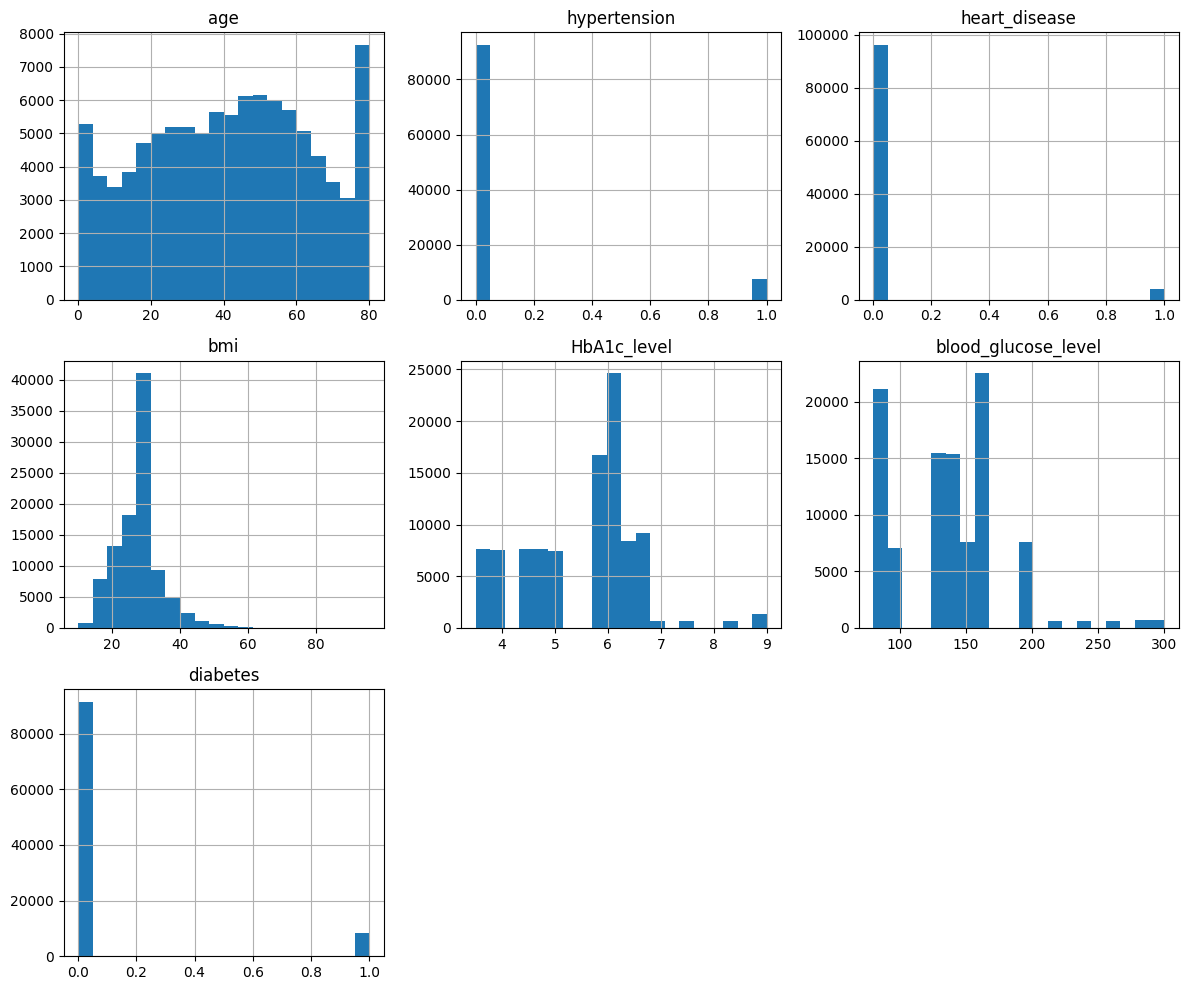

In [ ]:
# Explore distributions of numerical variables using histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


<ipython-input-60-6f9c57ce05cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


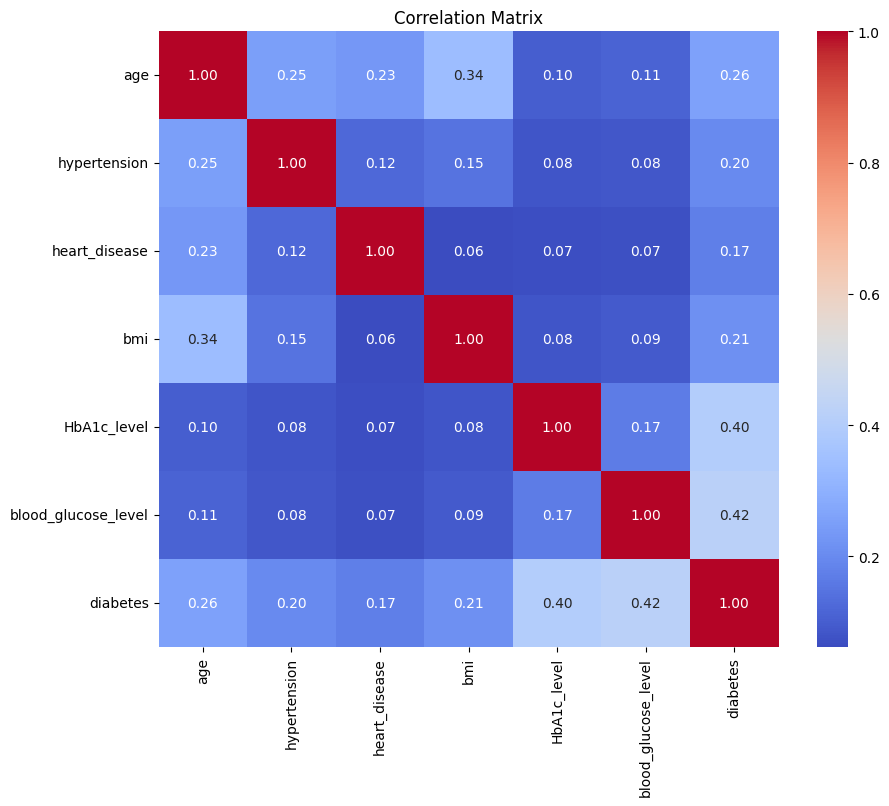

In [ ]:
# Step Explore correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encode categorical variables
# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'smoking_history'])
df_encoded.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,25.19,6.6,140,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,54.0,27.32,6.6,80,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,28.0,27.32,5.7,158,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3,36.0,23.45,5.0,155,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,76.0,20.14,4.8,155,0,0,1,0,0,1,0,1,0,1,0,0,0,0


In [ ]:
# Step 18: Scale numerical features
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define numerical columns to be scaled
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Scale numerical features
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the scaled DataFrame
df_encoded.head()


,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.177171,0.563636,0.272727,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0.674675,0.202031,0.563636,0.000000,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,0.349349,0.202031,0.400000,0.354545,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3,0.449449,0.156863,0.272727,0.340909,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,0.949950,0.118231,0.236364,0.340909,0,0,1,0,0,1,0,1,0,1,0,0,0,0


In [ ]:
# Step 19: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_encoded.drop('diabetes', axis=1)  # Features (X)
y = df_encoded['diabetes']  # Target variable (y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (80000, 17)
Shape of X_test: (20000, 17)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 20: Model Training
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Step 21: Model Evaluation
# Predict the labels for the testing set
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9591

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[18134   158]
 [  660  1048]]


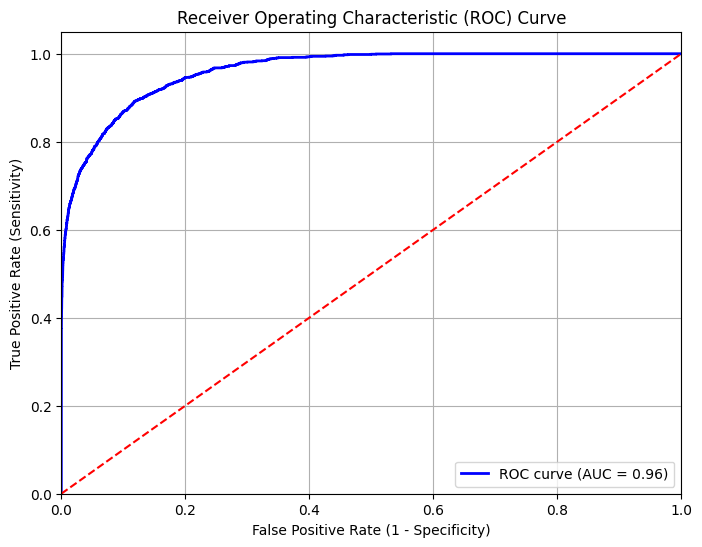

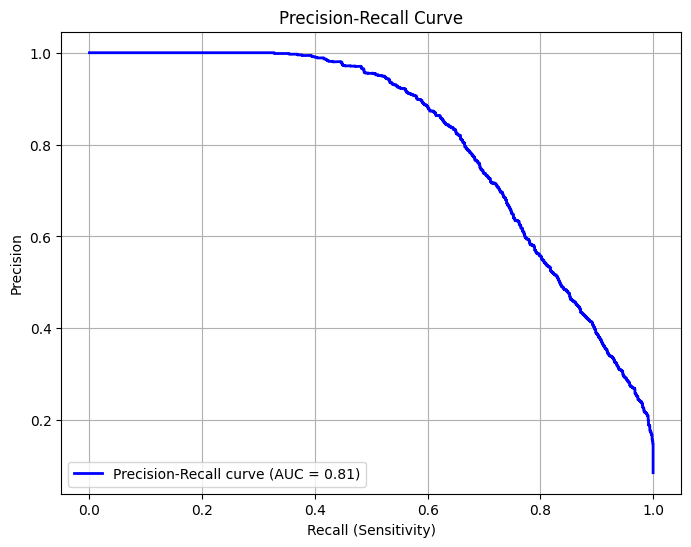

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot Precision-Recall Curve
# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9696

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18215    77]
 [  531  1177]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average=None)
recall_dt = recall_score(y_test, y_pred_dt, average=None)
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision (Class 0):", precision_dt[0])
print("Precision (Class 1):", precision_dt[1])
print("Recall (Class 0):", recall_dt[0])
print("Recall (Class 1):", recall_dt[1])
print("F1-score (Weighted Average):", f1_score_dt)


Decision Tree Classifier:
Accuracy: 0.9527
Precision (Class 0): 0.9750246467302005
Precision (Class 1): 0.7187141216991964
Recall (Class 0): 0.9732123332604418
Recall (Class 1): 0.7330210772833724
F1-score (Weighted Average): 0.9529110724637682


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20
2000/2000 [==============================] - 9s 3ms/step - loss: 0.1553 - accuracy: 0.9461 - val_loss: 0.1157 - val_accuracy: 0.9593
Epoch 2/20
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1157 - accuracy: 0.9593 - val_loss: 0.1139 - val_accuracy: 0.9593
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1161 - accuracy: 0.9593 - val_loss: 0.1154 - val_accuracy: 0.9599
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9600 - val_loss: 0.1148 - val_accuracy: 0.9600
Epoch 5/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1147 - accuracy: 0.9600 - val_loss: 0.1131 - val_accuracy: 0.9603
Epoch 6/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1134 - accuracy: 0.9608 - val_loss: 0.1140 - val_accuracy: 0.9614
Epoch 7/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1127 - accuracy: 0.9610 - val_loss: 0.1114 - val_accuracy

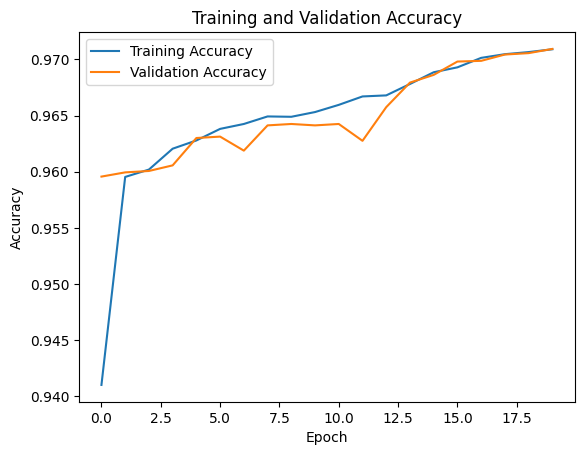

625/625 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9714
Test Loss: 0.08812370896339417
Test Accuracy: 0.9713500142097473


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
import numpy as np

# Define common ranges for each feature
age_range = (20, 80)  # Age typically ranges from 20 to 80 years
bmi_range = (10, 40)  # BMI typically ranges from 10 to 40
hba1c_level_range = (4.0, 7.0)  # HbA1c level typically ranges from 4.0 to 7.0
blood_glucose_level_range = (70, 140)  # Blood glucose level typically ranges from 70 to 140 mg/dL

# Generate random values for each feature within the defined ranges
num_samples = 5  # Number of samples to generate
random_age = np.random.uniform(low=age_range[0], high=age_range[1], size=num_samples)
random_bmi = np.random.uniform(low=bmi_range[0], high=bmi_range[1], size=num_samples)
random_hba1c_level = np.random.uniform(low=hba1c_level_range[0], high=hba1c_level_range[1], size=num_samples)
random_blood_glucose_level = np.random.uniform(low=blood_glucose_level_range[0], high=blood_glucose_level_range[1], size=num_samples)

# Create the simulated input data
simulated_input_data = {
    'age': random_age.tolist(),
    'bmi': random_bmi.tolist(),
    'HbA1c_level': random_hba1c_level.tolist(),
    'blood_glucose_level': random_blood_glucose_level.tolist(),
    # Add more features as needed
}

# Print the simulated input data
print("Simulated Input Data:")
print(simulated_input_data)


Simulated Input Data:
{'age': [20.37912489909345, 73.33418679044225, 43.78907133821798, 41.74514124635688, 60.640274153410225], 'bmi': [22.364623395212924, 22.79659155439179, 26.339127829423, 18.229978521788603, 38.18638021959276], 'HbA1c_level': [6.014422598231928, 6.482121812466745, 5.370567455744738, 4.441841053317142, 5.030799614079445], 'blood_glucose_level': [92.98823259109335, 102.27698053466003, 99.81734894266937, 72.87450696885846, 83.18779804311752]}
